# Multi-class SVM using Keras in TensorFlow

This notebook shows an example of training and
testing a multi-class SVM model on the classic
MNIST image set. We use the keras portion of
TensorFlow to do this.

## Imports

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras

# Print out the TensorFlow version to help others reproduce this notebook.
print(tf.__version__)

1.9.0


## Load in the data

In [2]:
mnist = keras.datasets.mnist

# I use underscores for the y values because we will need
# to process them further before they're ready to be fed
# into our model.
(X_train, y_train_), (X_test, y_test_) = mnist.load_data()

## Understand the data and its format

Each input is a black and white (single channel)
image of size 28x28. Each label is an integer from 0 to 9.

Each pixel has type `uint8`; an integer in the range [0, 256).

In [3]:
X_train.shape, X_train.dtype

((60000, 28, 28), dtype('uint8'))

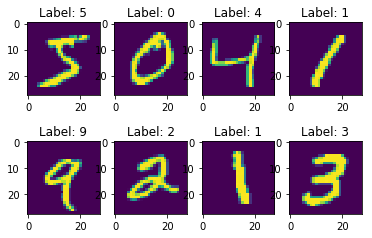

In [4]:
# Examine some of the data.

nrows, ncols = 2, 4

for i in range(nrows * ncols):
    
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(X_train[i])
    plt.title('Label: %d' % y_train_[i])
    
plt.show()

### Convert the y labels to one-hot vectors

We need to do this in order to use keras' built-in `categorical_hinge` loss function.

In [5]:
y_train = np.eye(10)[y_train_]
y_test  = np.eye(10)[y_test_]

# Sanity check.
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## Set up the keras model

This will be a support vector machine (SVM) that
provides 9 different output scores; the final output
of the model is the class with the highest score.

Each class is scored based on a linear classifier,
and a particular loss function called the hinge
loss is used.

In [6]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='linear'))
model.compile(
    optimizer = tf.train.AdamOptimizer(0.0002),
    loss = 'categorical_hinge',
    metrics = ['categorical_accuracy']
)

In [7]:
history = model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 2s 31us/step - loss: 16.4732 - categorical_accuracy: 0.7531
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 5.7410 - categorical_accuracy: 0.8681
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 4.4879 - categorical_accuracy: 0.8804
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 3.7738 - categorical_accuracy: 0.8844
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 3.3047 - categorical_accuracy: 0.8871
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 2.9584 - categorical_accuracy: 0.8912
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 2.7148 - categorical_accuracy: 0.8915
Epoch 8/10
60000/60000 [==============================] - 2s 28us/step - loss: 2.4910 - categorical_accuracy: 0.8919
Epoch 9/10
60000/60000 [==============================] - 2s 29

# Compute the test-set accuracy

In [8]:
results = model.evaluate(X_test, y_test)

print()
print('Test accuracy:')
print(results[1])

10000/10000 [==============================] - 0s 15us/step

Test accuracy:
0.8905


## Show some examples of found labels

In [9]:
# Get the predicted labels for the test data.

predicted_classes = model.predict_classes(X_test)

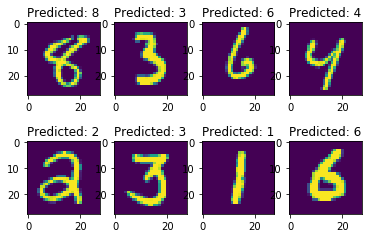

In [10]:
# Examine some of the predictions.

nrows, ncols = 2, 4

n_test_pts = X_test.shape[0]
show_idx = np.random.choice(
    np.arange(n_test_pts),
    size = nrows * ncols,
    replace = False
)

for i, pt_idx in enumerate(show_idx):
    
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(X_test[pt_idx])
    plt.title('Predicted: %d' % predicted_classes[pt_idx])
    
plt.show()

## Examine some mistakes made

It can be instructive to take a look at errors
the model makes. We'll get the indexes of all
the errors on the test set, and take a look at
a random subset of these.

In [11]:
# Find all the places in the test set where the model
# predicts the wrong class. The boolean != operator here
# results in an array of True/False values, and the
# np.flatnonzero() call converts that to the indexes
# where the value is True.

mistakes = np.flatnonzero(predicted_classes != y_test_)
len(mistakes)

1095

In [12]:
# Choose a random subset of mistakes that we'll display.

nrows, ncols = 2, 4

show_idx = np.random.choice(
    np.arange(len(mistakes)),
    size = nrows * ncols,
    replace = False
)
show_idx = mistakes[show_idx]

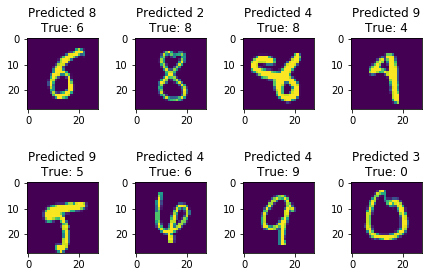

In [13]:
# Render and label the random mistakes.

plt.subplots(nrows, ncols)
plt.tight_layout(pad=0.0)

for i, pt_idx in enumerate(show_idx):
    
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(X_test[pt_idx])
    fmt = 'Predicted %d\nTrue: %d'
    title = fmt % (predicted_classes[pt_idx], y_test_[pt_idx])
    plt.title(title)
    
plt.show()

My take on the mistakes is that they are
"somewhat understandable," in the sense
that, visually, the incorrectly chosen class
is often a subset or superset of the correct
class. For example, if the image is of an 8,
but the model predicts a 9, it can be argued that
all the pixesl that are on for 9 may also be on
for an 8 as well.

Of course, they are still mistakes.

# Summary

The test accuracy for a multi-class SVM is 89.05%.

(You may see a slightly different value on your run since
models are randomly initialized each time.)